In [1]:
from os.path import join

import numpy as np
from numpy.random import choice, randn
from numpy.linalg import pinv, lstsq, norm

from scipy.io  import loadmat
from scipy.fftpack import dct, idct

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.rcParams['font.size'] = 18

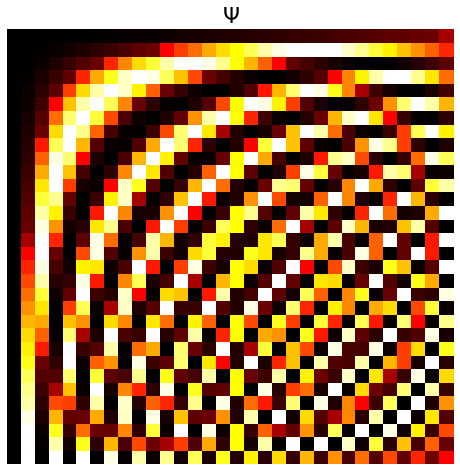

In [2]:
# Figure 3.4

cmap = ListedColormap(loadmat(join('..', 'DATA', 'CC2.mat'))['CC'])

n = 32
p = 14
Ψ = dct(np.identity(n))

fig, ax = plt.subplots(figsize=(8, 8))
ax.pcolormesh(np.flipud(Ψ), cmap=cmap)
ax.axis(False)
ax.set_title(r'$\Psi$');

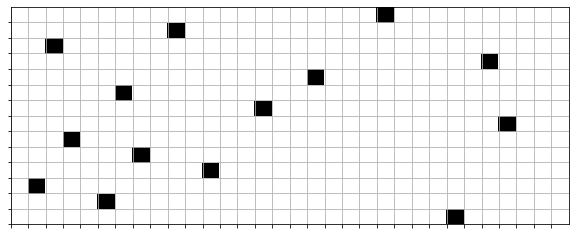

In [3]:
## Plot C
C = np.identity(n)
subset = choice(n, p, replace=False)
# Compressed measurement
C = C[subset, :]

fig, ax = plt.subplots(figsize=(10, 4))
ax.pcolormesh(np.flipud(C), cmap=cmap)
ax.grid(True)
ax.set_xticks(np.arange(n))
ax.set_yticks(np.arange(p))
ax.set_xticklabels([])
ax.set_yticklabels([]);

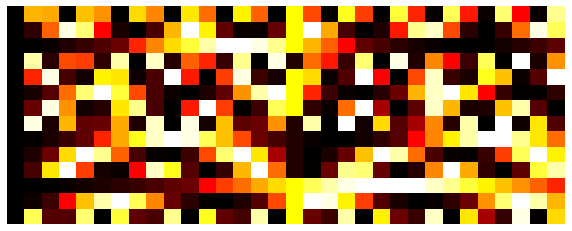

In [4]:
## Plot Theta
Θ = C @ Ψ
fig, ax = plt.subplots(figsize=(10, 4))
ax.pcolormesh(np.flipud(Θ), cmap=cmap)
ax.axis(False);

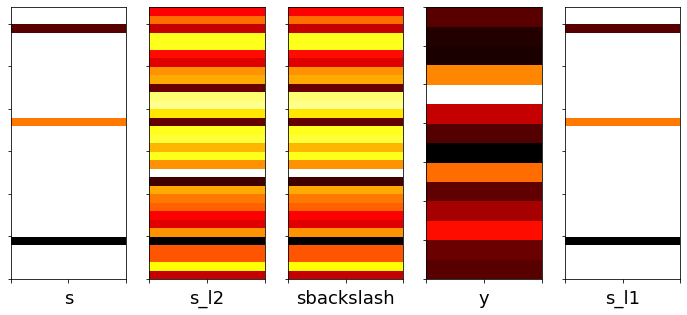

In [5]:
## Plot s, y
s = np.zeros((n,1))
s[2] = 1.4
s[13] = 0.7
s[27] = 2.2
y = C @ Ψ @ s
s_l2 = pinv(Θ) @ y
# This isn't really "backslash" - try and find equivalent..
sbackslash = lstsq(Θ, y, rcond=None)[0]

# L1-Minimization using cvxpy
# https://www.cvxpy.org/
import cvxpy as cp
s_l1 = cp.Variable(n)
cp.Problem(
    cp.Minimize(cp.norm1(s_l1)),
    [Θ @ s_l1 == y.ravel()]
).solve()
s_l1 = s_l1.value

fig, axs = plt.subplots(1, 5, figsize=(12, 5))
for ax, im, label in zip(axs, [s, s_l2, sbackslash, y, s_l1[:, np.newaxis]], ['s', 's_l2', 'sbackslash', 'y', 's_l1']):
    ax.pcolormesh(np.flipud(im), cmap=cmap)
    ax.set_xlabel(label)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

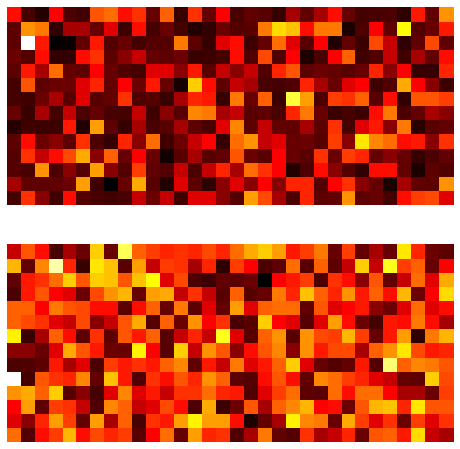

In [6]:
## Plot C and Theta (2) - Gaussian Random
C = randn(p, n)
Θ = C @ Ψ

fig, axs = plt.subplots(2, 1, figsize=(8, 8))
for ax, im in zip(axs, [C, Θ]):
    ax.pcolormesh(np.flipud(im), cmap=cmap)
    ax.axis(False)

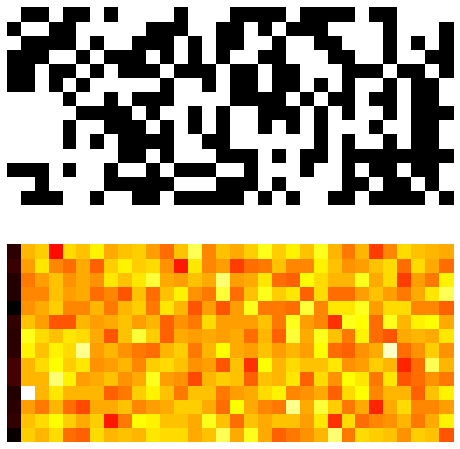

In [7]:
# Plot C and Theta (3) - Bernoulli Random
C = randn(p ,n)
C = C > 0
Θ = C @ Ψ

fig, axs = plt.subplots(2, 1, figsize=(8, 8))
for ax, im in zip(axs, [C, Θ]):
    ax.pcolormesh(np.flipud(im), cmap=cmap)
    ax.axis(False)

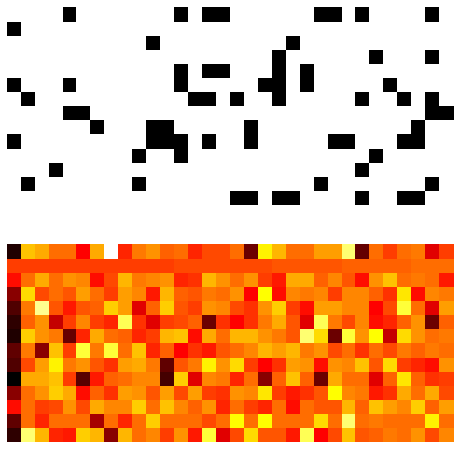

In [8]:
# Plot C and Theta (4) - Sparse Bernoulli
C = randn(p, n)
C = C > 1
Θ = C @ Ψ

fig, axs = plt.subplots(2, 1, figsize=(8, 8))
for ax, im in zip(axs, [C, Θ]):
    ax.pcolormesh(np.flipud(im), cmap=cmap)
    ax.axis(False)

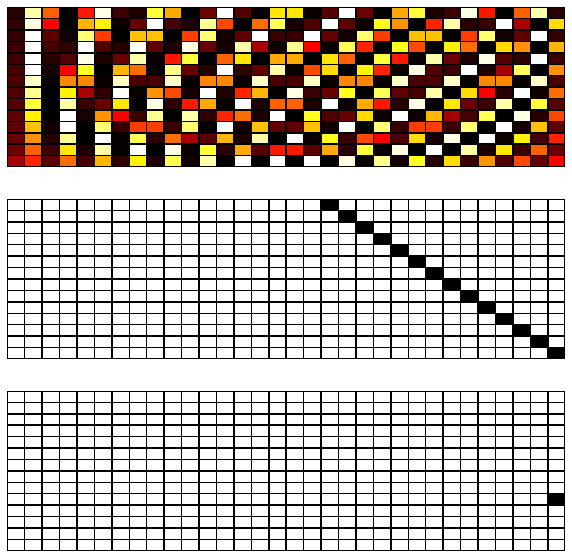

In [9]:
# Bad C and Theta (5) - DCT Meas
C = idct(np.identity(n))
subset = np.arange(n-p, n)
C = C[subset, :] # compressed measurement

Θ = C @ Ψ
y = Θ @ s

fig, axs = plt.subplots(3, 1, figsize=(10, 10))
for ax, im in zip(axs, [C, Θ, np.c_[np.zeros((p, n-1)), y]]):
    ax.pcolormesh(np.flipud(im), cmap=cmap, edgecolors='black', linewidth=0.5)
    ax.axis(False)